In [12]:
"""Adapted from: https://www.programmersought.com/article/8437785923/"""
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [13]:
def showImage(img):
    plt.imshow(img, cmap="gray")

In [14]:
img = cv2.imread('../img/bus_uk.jpg', 0)

In [15]:
# Fourier transform
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

In [17]:
 # 
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

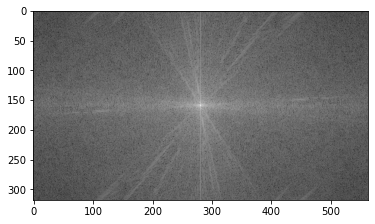

In [18]:
showImage(magnitude_spectrum)

In [22]:
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
# Create a mask with a square of 1 and the rest 0
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# Use mask
fshift = dft_shift*mask
magnitude_spectrum1 = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

<ipython-input-22-0b4218fa8c2e>:9: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum1 = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


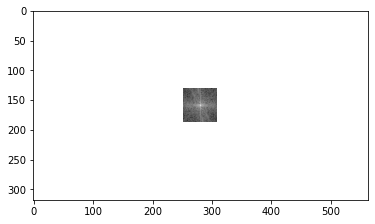

In [23]:
showImage(magnitude_spectrum1)

In [20]:
# do IDFT: back to original image

#shift
f_ishift = np.fft.ifftshift(fshift)

# inverse Fourier transform
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

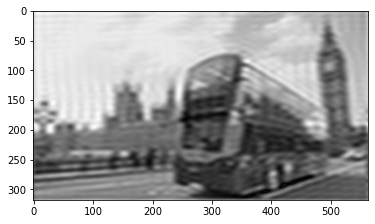

In [21]:
showImage(img_back)

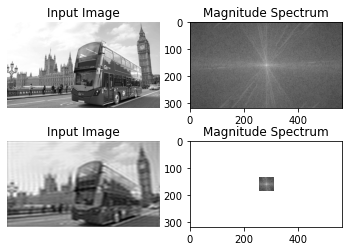

In [7]:
plt.subplot(221), plt.imshow(img, cmap='gray'),
plt.title('Input Image'), plt.axis('off')

plt.subplot(222), plt.imshow(magnitude_spectrum, cmap='gray'),
plt.title('Magnitude Spectrum')

plt.subplot(223), plt.imshow(img_back, cmap='gray'),
plt.title('Input Image'), plt.axis('off')

plt.subplot(224), plt.imshow(magnitude_spectrum1, cmap='gray'),
plt.title('Magnitude Spectrum')

plt.show()